In [5]:
#Clase 185 - Copiamos la primera celda del archivo Clase 180-184.ipynb:
#
# Importamos Pandas para acceder a archivos
import pandas
# Importamos el objeto de tiempo datetime - Clase 183
from datetime import datetime
# Importar utc de la librería pytz para establecer sistema de fechas - Clase 183
from pytz import utc
# Importar Matplotlib para hacer plotting como "plt"
import matplotlib.pyplot as plt

# Accedemos al archivo reviews.csv
data = pandas.read_csv("downloads/reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## 1. Groupby - Pandas - 185

### Rating Average By Day

In [6]:
# Agrupando por timestamp:

## Crearemos una nueva columna para seleccionar solo el día de la publicación del comentario
## Porque sino, groupby, agrupará por tiempos iguales, cosa que no existe, ya que cada comentario es creado en un minuto/segundo diferente
# Creando Nueva Columna "Day":

data['Day'] = data['Timestamp'].dt.date

# Group by Day (la nueva columna)
## day_average = data.groupby(['Timestamp']) -- Si lo hicieramos así, agruparía por tiempo y este dato no se repite
## Hay que agregar al final el método de agrupación que queremos que emplee; en este caso .mean()
day_average = data.groupby(['Day']).mean(numeric_only=True)
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


### Plotting Average Rating per Day

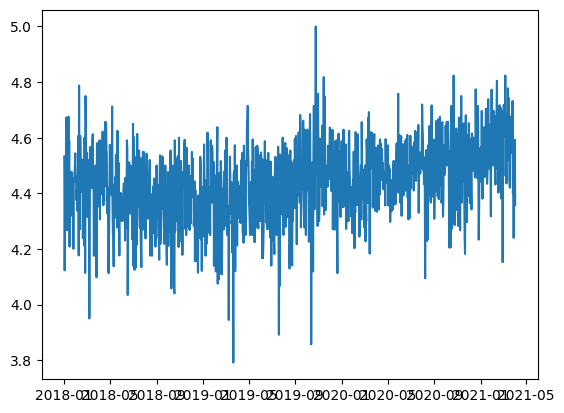

In [13]:
# Importamos plt (matplotlib.pyplot) en la primera celda
plt.plot(day_average.index, day_average['Rating'])

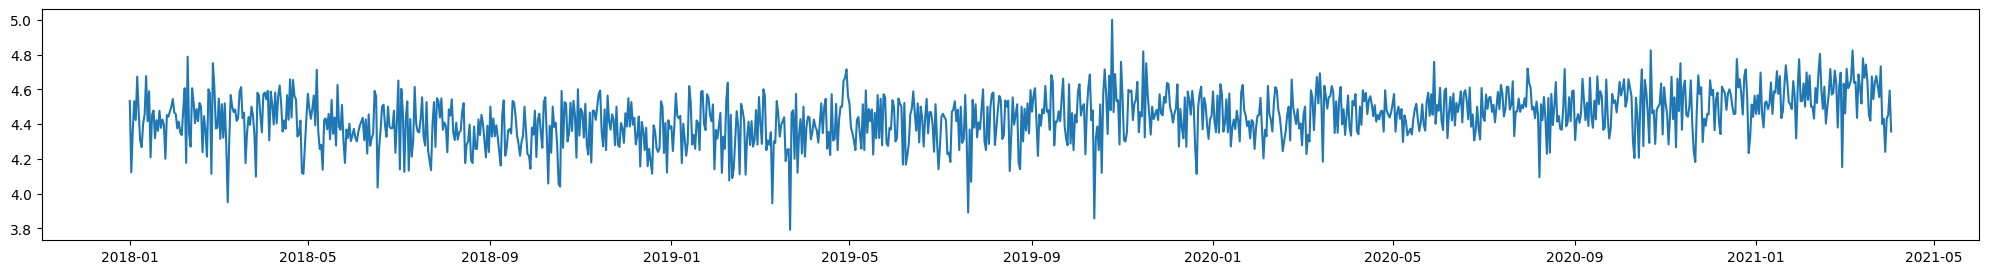

In [17]:
# matplotlib genera respuestas en formato imagen, si queremos una figura interactiva para poder hacer hovers, zoom, etc..
# Podemos, en primer lugar modificar sus dimensiones:
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

### Plotting Average Ratings by Week - 186

In [29]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U') # String from time (strftime)
week_average=data.groupby(['Week']).mean(numeric_only=True)
# o también--> week_average=data.groupby(['Week'])['Rating'].mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


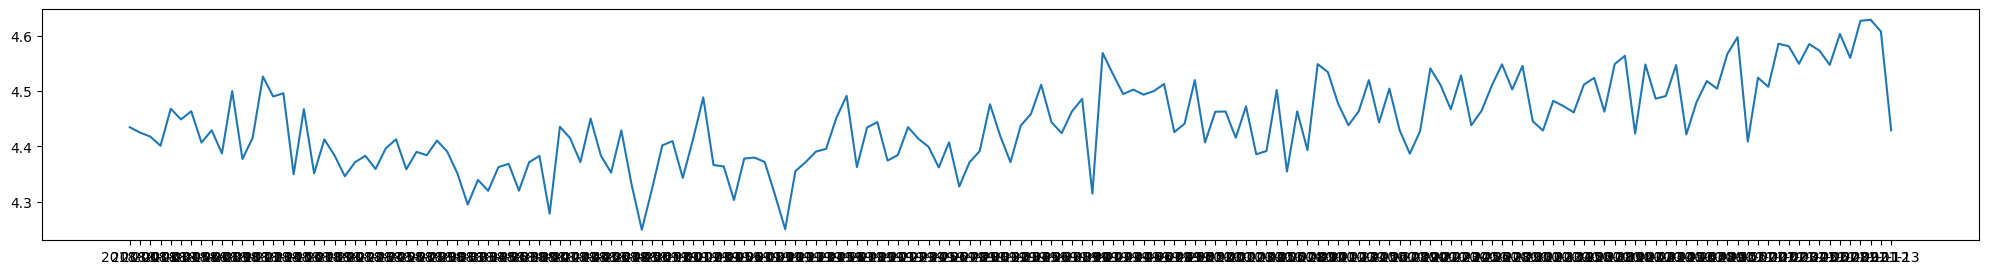

In [31]:
# Creando el plot
plt.figure(figsize=(25,3))
plt.plot(week_average.index,week_average['Rating'])

### Plotting Average Ratings by Month - 187

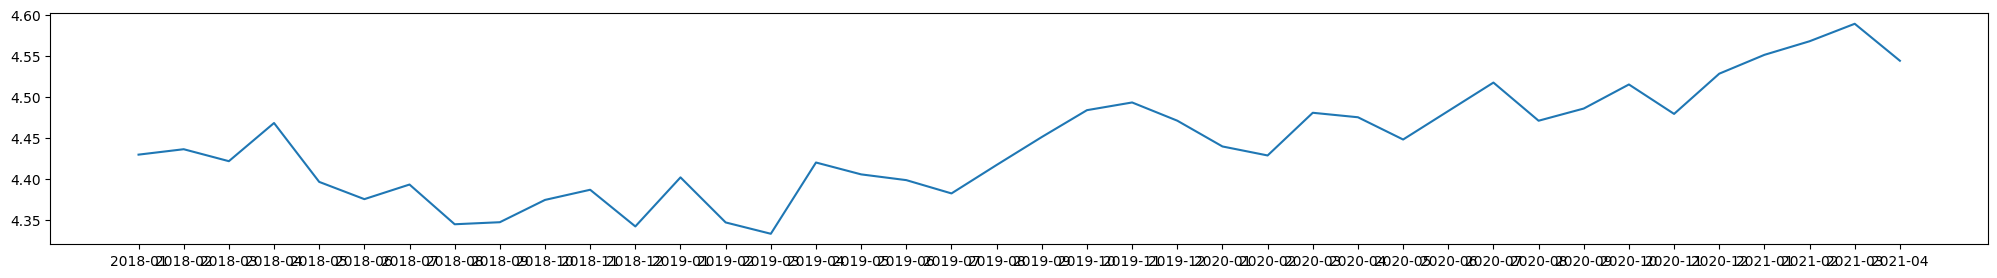

In [33]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average=data.groupby(['Month']).mean(numeric_only=True)
plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

### Average Ratings by Course by Month - 188

In [42]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_av_crs = data.groupby(['Month','Course Name']).mean(numeric_only=True)
month_av_crs

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
...                                                              ...
2021-03 The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

[262 rows x 1 columns]

In [65]:
#Ver el nuevo dataframe agrupada, pero separado por curso:
month_av_crs = data.groupby(['Month','Course Name']).mean(numeric_only=True).unstack()
month_av_crs.head()

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   

                                                                  \
Course Name Interactive Data Visualization with Python and Bokeh   
Month                                                              
2018-01                                               4.285714     
2018-02                                               4.157895     
2018-03                                               4.266667     
2018-04                                               4.428571     
2018-05                                               4.107143     

                                                                      \
Course Name Learn GIS in One Hour Python for Beginners with Examples   
Month                                                                  
2018-01                  4.236842                           4.355422   
2018-02                  4.437500                           4.363095   
2018-03                  4.166667                           4.357143   
2018-04                  4.250000                           4.378947   
2018-05                  4.666667                           4.362654   

                                                                        \
Course Name The Complete Python Course: Build 10 Professional OOP Apps   
Month                                                                    
2018-01                                                    NaN           
2018-02                                                    NaN           
2018-03                                                    NaN           
2018-04                                                    NaN           
2018-05                                                    NaN           

                                                                      
Course Name The Python Mega Course: Build 10 Real World Applications  
Month                                                                 
2018-01                                               4.457368        
2018-02                                               4.481070        
2018-03                                               4.447037        
2018-04                                               4.507412        
2018-05                                               4.422085

<Axes: xlabel='Month'>

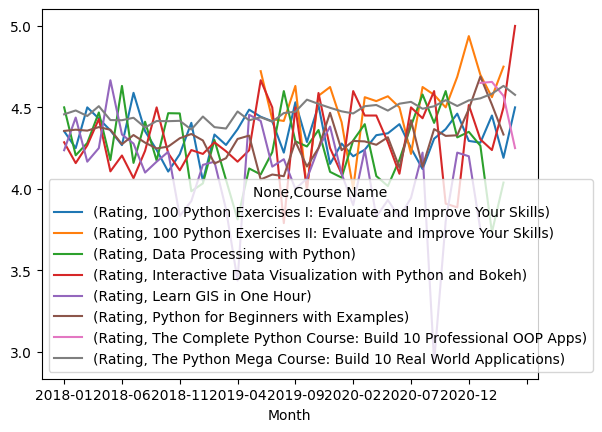

In [58]:
#Plotting
month_av_crs.plot()

<Axes: xlabel='Month'>

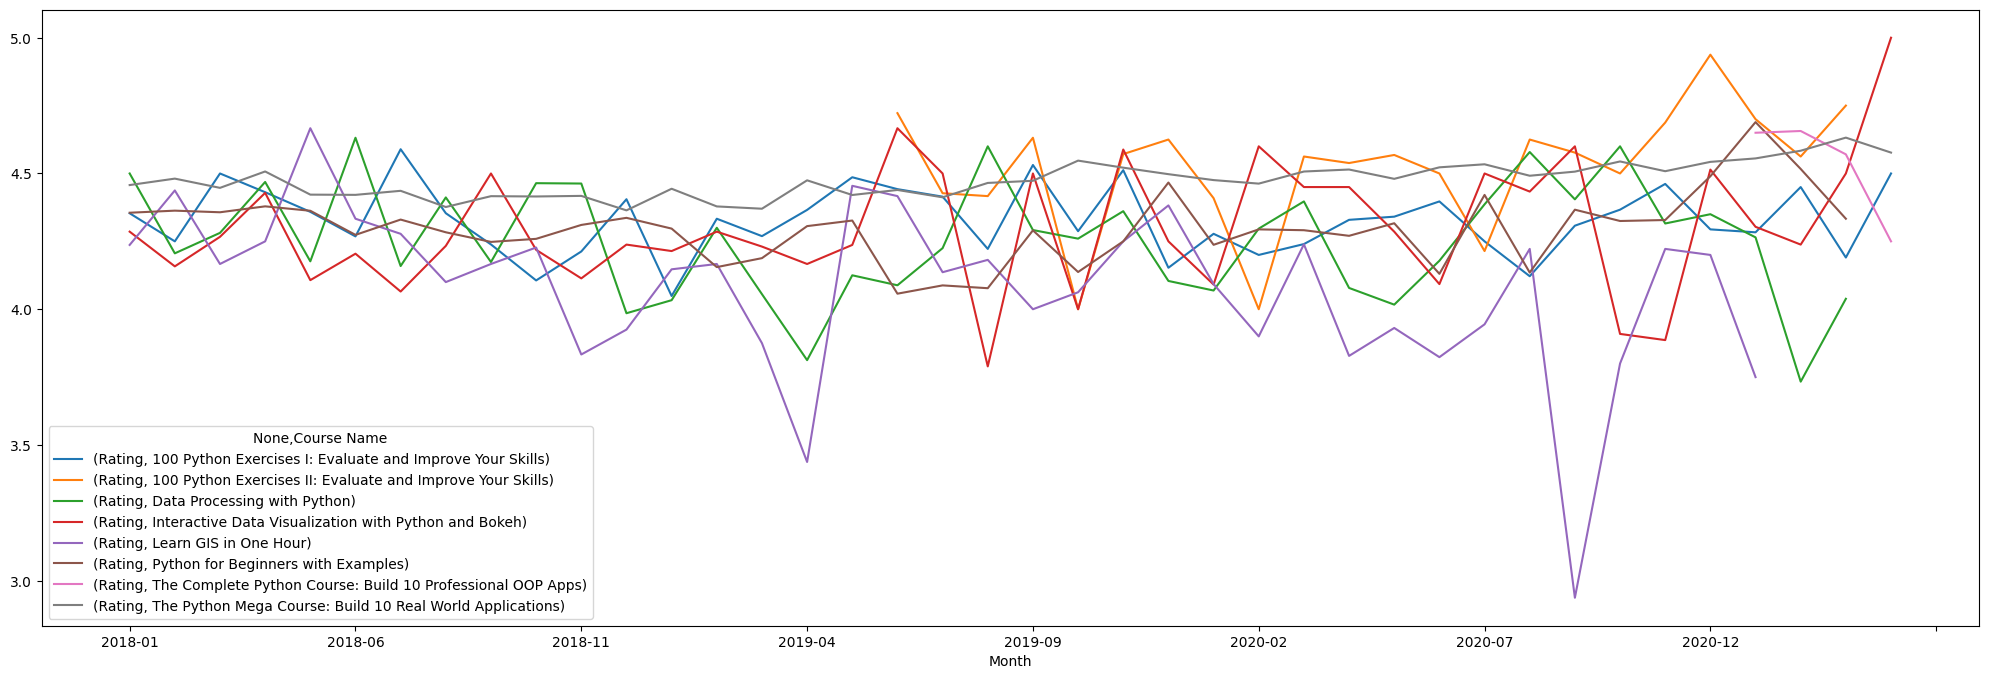

In [66]:
# Al usar el método plot() en el dataframe directamente en vez de en una variable plt podemos añadir el parámetro figsize:
month_av_crs.plot(figsize=(25,8))
## CORRECTO!!

<Axes: xlabel='Month'>

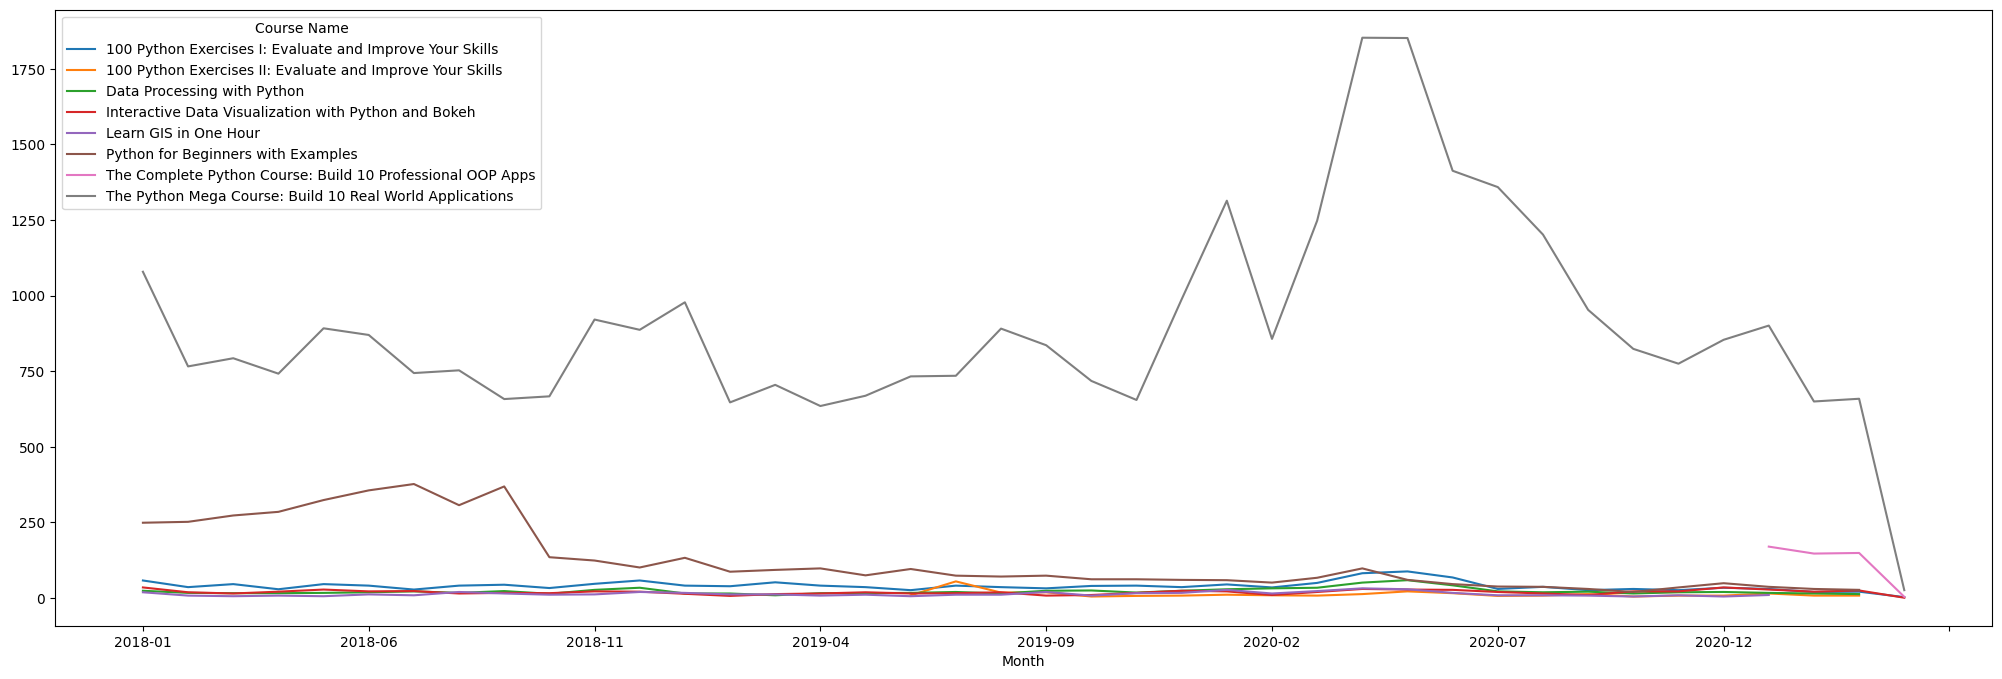

In [67]:
# PRUEBAS CON COUNT()
month_av_crs = data.groupby(['Month','Course Name'])['Rating'].count().unstack()
month_av_crs.plot(figsize=(25,8))

In [85]:
month_av_crs.head()

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,58.0,NaN,24.0,35.0,19.0,249.0,NaN,1079.0
2018-02,36.0,NaN,17.0,19.0,8.0,252.0,NaN,766.0
2018-03,46.0,NaN,16.0,15.0,6.0,273.0,NaN,793.0
2018-04,29.0,NaN,16.0,21.0,8.0,285.0,NaN,742.0
2018-05,46.0,NaN,17.0,28.0,6.0,324.0,NaN,892.0


### What Day of the Week are People the Happiest? - 189

In [70]:
# Si la media del Rating de todos los cursos es más alta X día; podemos afirmar que los días X la gente es más feliz
data['Weekday']=data['Timestamp'].dt.strftime('%A') # %A para extraer el día de la semana
data

,Course Name,Timestamp,Rating,Comment,Week,Month,Weekday
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-13,2021-04,Friday
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-13,2021-04,Friday
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-13,2021-04,Friday
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-13,2021-04,Friday
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-13,2021-04,Friday
...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-00,2018-01,Monday
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-00,2018-01,Monday
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-00,2018-01,Monday
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-00,2018-01,Monday


In [73]:
# Ahora que tenemos el dataframe con la columna representando el día de la semana correspondiente
# Veamos qué día de la semana tiene una media de Rating mayor:
weekday_av = data.groupby(['Weekday']).mean(numeric_only=True)
weekday_av

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


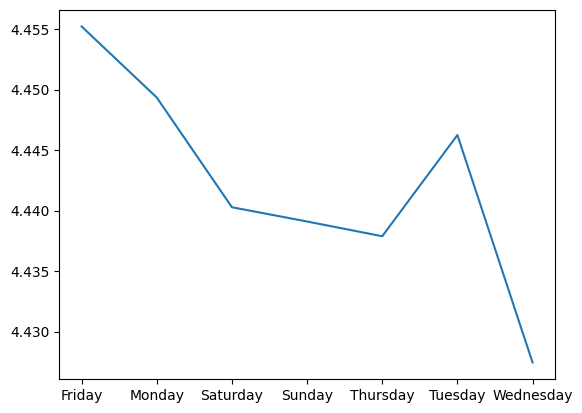

In [75]:
# Plotting para ver gráficamente
plt.plot(weekday_av.index, weekday_av['Rating'])

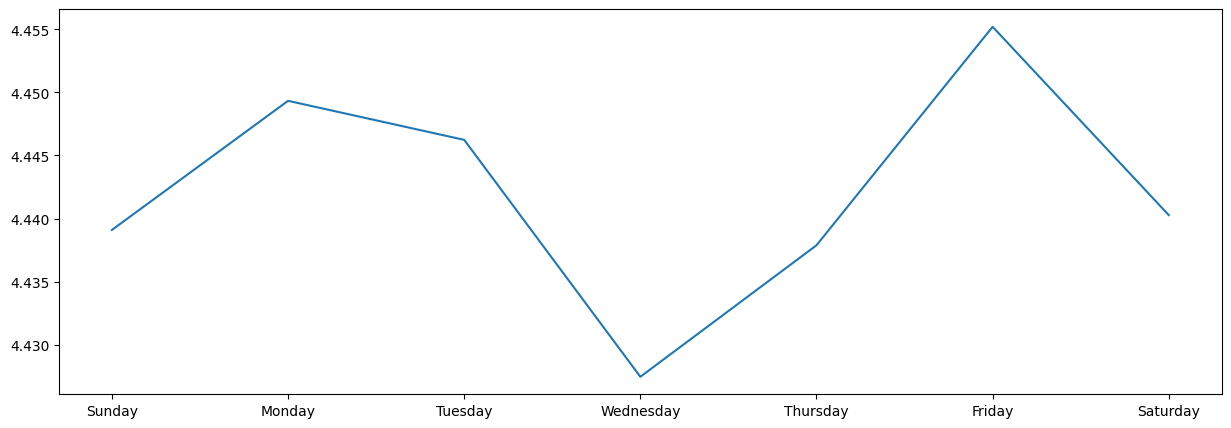

In [90]:
# El orden de los días no es el esperado -Está por orden alfabético- ; pero podemos arreglarlo

# Orden alfabético:
# data['Weekday']=data['Timestamp'].dt.strftime('%A')
# weekday_av = data.groupby(['Weekday']).mean(numeric_only=True)
# weekday_av = weekday_av.sort_values('Weekday')
# weekday_av

# Orden por día de la semana
data['Weekday']=data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w') # %w Día de la semana pero en formato número
weekday_av = data.groupby(['Weekday', 'Daynumber']).mean(numeric_only=True)
weekday_av = weekday_av.sort_values('Daynumber')

# Actualmente la columna tiene dos índices (weekday con los días de la semana en texto y Daynumber con los días de la semana en número)
# Para tomar como índice los días de la semana en texto:
indice = weekday_av.index.get_level_values(0) # Si quisiéramos el segundo índice, pondríamos "1" en vez de "0"

# Creando la gráfica
plt.figure(figsize=[15,5])
plt.plot(indice, weekday_av['Rating'])

## 2. Other Types of Plots - 190

In [92]:
# Hasta ahora todos los plto han sido generados mediante el método "plot()", el cual genera gráficos lineales
# Para indagar en más métodos diferentes, y por ende, más tipos de gráficos, usaremos:
dir(plt)
# No todos son tipos de gráficos, algunos son propiedades para añadir a algunos gráficos
# help(plt.pie) -> para más información de alguno en concreto

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_pyplot_note',
 '_api',
 '_auto_draw_if_interactive',
 '_

### Number of Ratings by Course

In [99]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x29148cf0690>,
 [Text(1.093204501902345, 0.12208159984389857, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539490063081, 0.26357989832654555, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237467267586, 0.3482339511976009, 'Data Processing with Python'),
  Text(0.9969710233917297, 0.4648104759116852, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514243624985, 0.5509973551382421, 'Learn GIS in One Hour'),
  Text(0.6871673546107159, 0.8589534485391574, 'Python for Beginners with Examples'),
  Text(0.3307029829407597, 1.0491117848323332, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.876275637740144, -0.6649368441461971, 'The Python Mega Course: Build 10 Real World Applications')])

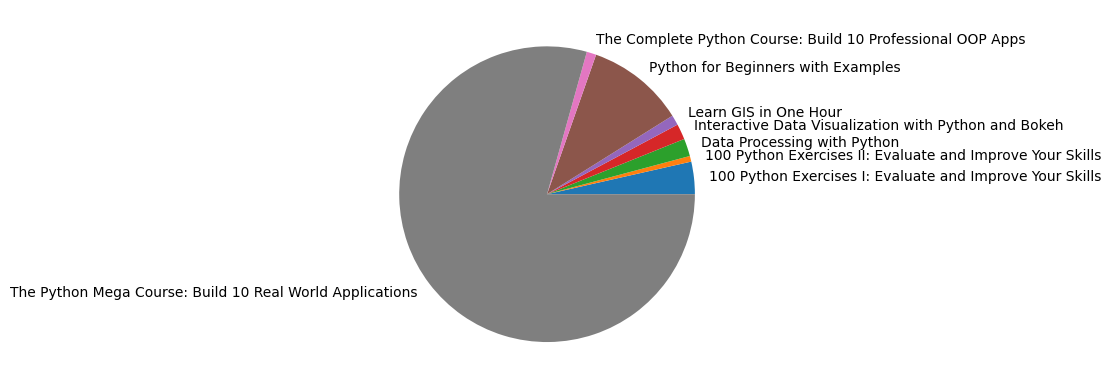

In [101]:
plt.pie(share, labels=share.index)

In [28]:
#data['Weekday']=data['Timestamp'].dt.strftime('%A')
data['Day'] = data['Timestamp'].dt.strftime('%Y-%m-%d')
day_average = data.groupby(['Day']).mean(numeric_only=True)
type(list(day_average.index))

list